In [0]:
from fastai.vision import *

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

In [0]:
folder = 'zuck'
file = 'zuck.txt'

In [0]:
folder = 'robot'
file = 'robot.txt'

In [6]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir= "/content/gdrive/My Drive/"
base_dir = root_dir + 'ML Data/'

Mounted at /content/gdrive


In [0]:
path = Path(base_dir + 'data/zuck-robot')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [15]:
path.ls()

[PosixPath('/content/gdrive/My Drive/ML Data/data/zuck-robot/zuck'),
 PosixPath('/content/gdrive/My Drive/ML Data/data/zuck-robot/robot'),
 PosixPath('/content/gdrive/My Drive/ML Data/data/zuck-robot/zuck.txt'),
 PosixPath('/content/gdrive/My Drive/ML Data/data/zuck-robot/robot.txt')]

In [0]:
classes = ['zuck', 'robot']

In [0]:
download_images(path/file, dest, max_pics=200)

In [0]:
for c in classes:
  print(c)
  verify_images(path/c, delete=True, max_size=500)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4, bs = 32).normalize(imagenet_stats)

In [24]:
data.classes

['robot', 'zuck']

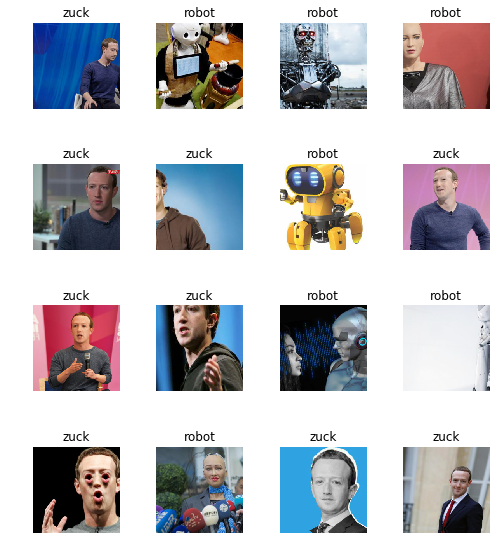

In [36]:
data.show_batch(rows=4, figsize=(7,8))

In [9]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['robot', 'zuck'], 2, 285, 71)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy, wd=1e-2, bn_wd=True, true_wd=True, loss_func=LabelSmoothingCrossEntropy(), pretrained=True, ps=0.5)

In [39]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,accuracy,time
0,0.539852,0.364083,0.943662,00:08
1,0.537071,0.385709,0.957747,00:05
2,0.466087,0.375966,0.915493,00:05
3,0.429866,0.316854,0.957747,00:06
4,0.392176,0.307817,0.957747,00:05
5,0.366055,0.301734,0.971831,00:05


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-07
Min loss divided by 10: 9.12E-06


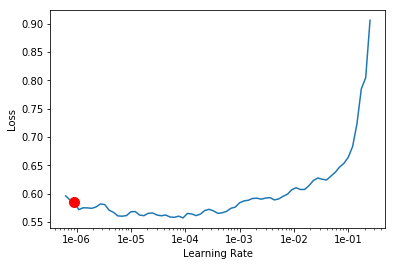

In [30]:
learn.lr_find()
learn.recorder.plot(suggestion=True, return_fig=True)
lr = learn.recorder.min_grad_lr

In [31]:
learn.fit_one_cycle(3, max_lr=slice(9e-07,9e-6))

epoch,train_loss,valid_loss,accuracy,time
0,0.556623,0.477405,0.810811,00:05
1,0.575716,0.472527,0.824324,00:05
2,0.556317,0.467506,0.797297,00:05


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-1')

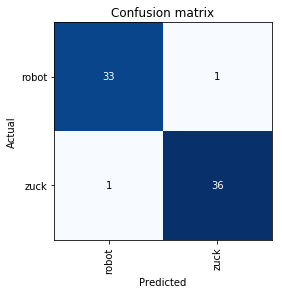

In [41]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

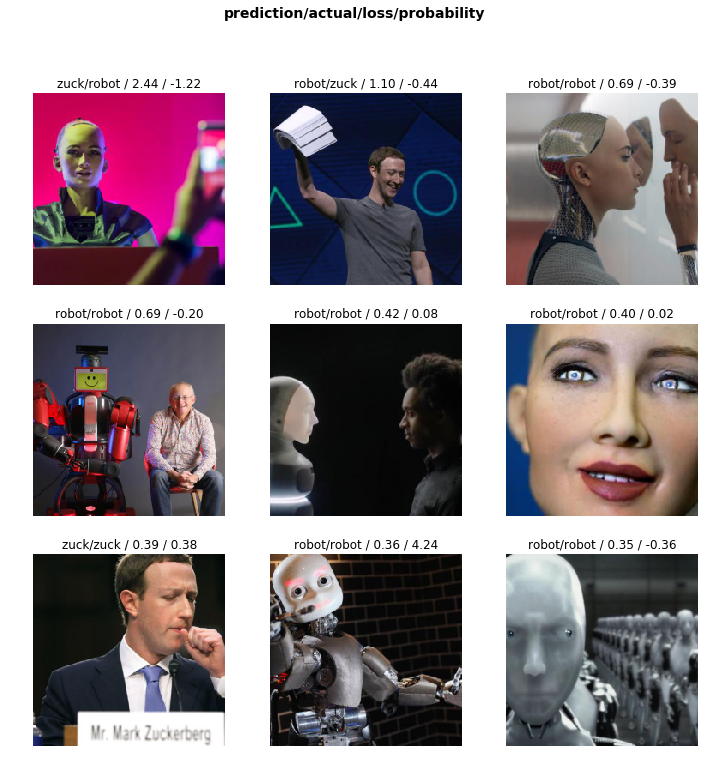

In [42]:
interp.plot_top_losses(9)

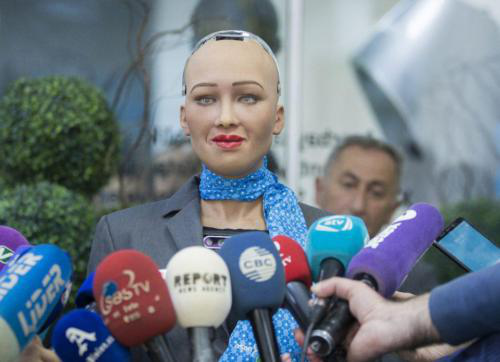

In [13]:
img = open_image(path/'robot'/'00000079.jpg')
img

In [0]:
learn.export('export.pkl')
learn = load_learner(path)

In [17]:
learn.predict(img)

(Category robot, tensor(0), tensor([0.5374, 0.1407]))